In [8]:
# medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [9]:
from pathlib import Path
import requests
csv_path=Path("data/")
file_path=csv_path/"csv_file"

if file_path.is_dir():
  print(f"directory {file_path} exists..")
else:
  file_path.mkdir(parents=True, exist_ok=True)

  #downloading the dataset..

  with open(csv_path/"medical-charges.csv","wb") as f:
    response=requests.get("https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv")
    print('downloading the file')
    f.write(response.content)

downloading the file


In [13]:
import pandas as pd
medical_df=pd.read_csv("/content/data/medical-charges.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [19]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

#data visualization

In [25]:
#lets visualize for age

fig=px.histogram(
    medical_df,
    x="age",
    marginal="box",
    nbins=47,
    title='distribution of ages'
)
fig.update_layout(bargap=0.1)
fig.show()

the distribution shows that there are arund 20 to 30 customers of every age but the number of customers is very high for age of 18 and 19


In [26]:
#bmi
fig=px.histogram(
    medical_df,
    x="bmi",
    marginal="box",
    title="distribution of bmi"
)
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.


In [28]:
#charges(based on smoker or nonsmoker, you can also do based on gender aswell)

fig=px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color='smoker',
    title="charge distribution",
    color_discrete_sequence=["green","grey"]

)
fig.update_layout(bargap=0.1)
fig.show()

from the diagram we can see that

*   non smokers pay less then 10k per year whereas smokers pay more then 10k
*   most of the number of people pay less then 10k and only fraction of population pay  over 10k


*   if we see the bar diagram, we can see median of non smoker is 7.3k whereas smokers median is 34.4k








In [31]:
#now lets visualize based on gender
fig=px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color='sex',
    title="charge distribution",
    color_discrete_sequence=["green","grey"]

)
fig.update_layout(bargap=0.1)
fig.show()

here , we can see that

*   more female have insurance charges compared to male
  



In [32]:
#lets do based on region
#now lets visualize based on gender
fig=px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color='region',
    title="charge distribution",
    color_discrete_sequence=["green","grey"]

)
fig.update_layout(bargap=0.1)
fig.show()

now conclude yourself, im tired


In [34]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [35]:
fig=px.histogram(
    medical_df,
    x="smoker",
    marginal="box",
    color='sex',
    title="smokers based on gender",
    color_discrete_sequence=["green","grey"]

)
fig.update_layout(bargap=0.1)
fig.show()

from here we can see number of male for both yes and no is more then female


In [38]:
#now lets visualize using scatter plot
fig=px.scatter(
    medical_df,
    x="age",
    y="charges",
    color="smoker",
    hover_data=['sex'],
    title="age vs charges"
)
fig.update_traces(marker_size=5)
fig.show()

we can see that as the age increases charges also tend to increaase. there are 3 main clusters

*   the lowest clusters consists of healthy non smokers
*   the middle cluster is mixture of smokers and non smokers with more medical charges then first clusters, it may be the overlap between non smokers with health issues and smoker with no major health issues

*   the top cluster consists of smokers with health issues who have more charges






In [40]:
#now lets visualize between bmi and charges

fig=px.scatter(
    medical_df,
    x="bmi",
    y="charges",
    color="smoker",
    hover_data=["sex"],
    title="bmi vs charges"
)

fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [42]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [46]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [45]:
#for smoker, we first need to asign no as 0 and yes as 1 since correlation can work only on numeric value

smoker_values={
    "no":0,
    "yes":1
}

smoker_numeric=medical_df.smoker.map(smoker_values)

In [48]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [50]:
medical_df.corr()

ValueError: could not convert string to float: 'female'

In [52]:
# Calculate correlations for numeric columns only
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'correlation matrix')

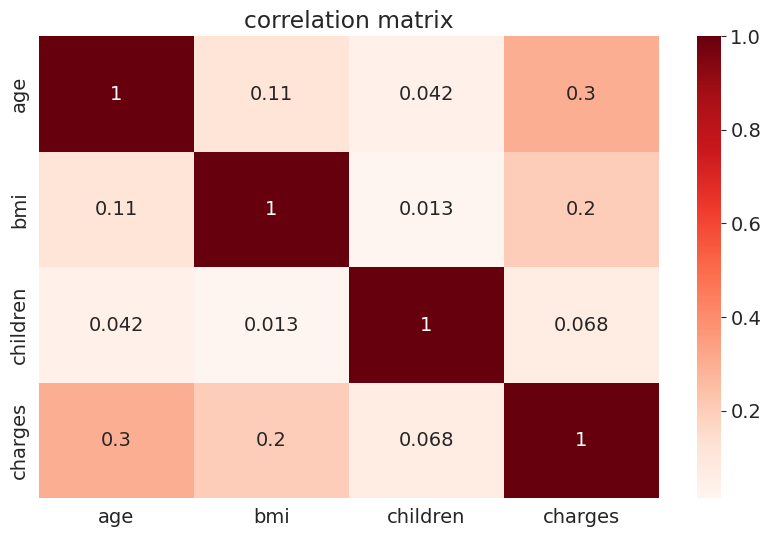

In [56]:
#now lets visualize using heatmap
sns.heatmap(medical_df.corr(numeric_only=True),cmap="Reds", annot=True)
plt.title("correlation matrix")